# ML Challenge 

<img src="https://imageio.forbes.com/specials-images/imageserve/5ecd179f798e4c00060d2c7c/0x0.jpg?format=jpg&height=600&width=1200&fit=bounds" width="500" height="300">

In the bustling city of Financia, the Central Lending Institution (CLI) is the largest provider of loans to individuals and businesses. With a mission to support economic growth and financial stability, CLI processes thousands of loan applications every month. However, the traditional manual review process is time-consuming and prone to human error, leading to delays and inconsistencies in loan approvals.
To address these challenges, CLI has decided to leverage the power of machine learning to streamline their loan approval process. They have compiled a comprehensive dataset containing historical loan application records, including various factors such as credit scores, income levels, employment status, loan terms(measured in years), loan amounts, asset values, and the final loan status (approved or denied).


**Your task is to develop a predictive model that can accurately determine the likelihood of loan approval based on the provided features. By doing so, you will help CLI make faster, more accurate, and fairer lending decisions, ultimately contributing to the financial well-being of the community.**

It is recommended that you follow the typical machine learning workflow, though you are not required to strictly follow each steps: 
1. Data Collection: Gather the data you need for your model. (Already done for you)

2. Data Preprocessing: Clean and prepare the data for analysis. (Already done for you)

3. Exploratory Data Analysis (EDA): Understand the data and its patterns. (Partially done for you)

4. Feature Engineering: Create new features or modify existing ones to improve model performance. (Partially done for you)

5. Model Selection: Choose the appropriate machine learning algorithm.

6. Model Training: Train the model using the training dataset.

7. Model Evaluation: Evaluate the model's performance using a validation dataset.

8. Model Optimization: Optimize the model's parameters to improve performance.

9. Model Testing: Test the final model on a separate test dataset.

**Please include ALL your work and thought process in this notebook**

In [1]:
# You may include any package you deem fit. We sugggest looking into Scikit-learn
import pandas as pd
import numpy as np

## Dataset


In [2]:
# DO NOT MODIFY
loan_data = pd.read_csv("../../data/loan_approval.csv")


## EDA

In [3]:
loan_data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# ------ Display basic information ------
print(loan_data.columns)
print(loan_data.describe())

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')
           loan_id  no_of_dependents  income_annum   loan_amount    loan_term  \
count  4269.000000       4269.000000  4.269000e+03  4.269000e+03  4269.000000   
mean   2135.000000          2.498712  5.059124e+06  1.513345e+07    10.900445   
std    1232.498479          1.695910  2.806840e+06  9.043363e+06     5.709187   
min       1.000000          0.000000  2.000000e+05  3.000000e+05     2.000000   
25%    1068.000000          1.000000  2.700000e+06  7.700000e+06     6.000000   
50%    2135.000000          3.000000  5.100000e+06  1.450000e+07    10.000000   
75%    3202.000000          4.000000  7.500000e+06  2.150000e+07    16.000000   
max    4269.000000          5.000000  9.900000e+06  3.950000e+07    

In [6]:
# ------ Check for missing values ------
print(loan_data.isnull().sum())
# Thank you for cleaning the data for us!

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


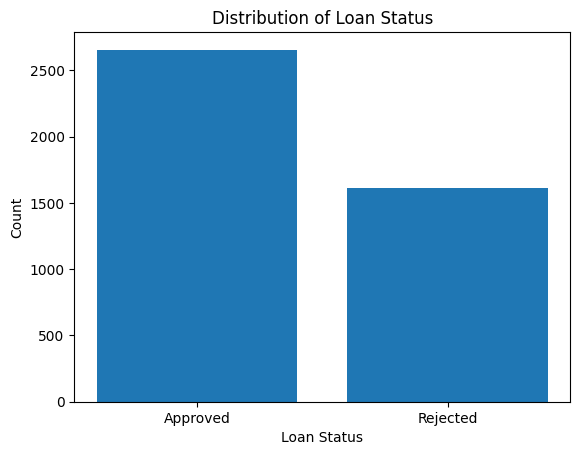

In [7]:
# ------ Visualize the distribution of loan status ------
loan_status_counts = loan_data['loan_status'].value_counts()
plt.bar(loan_status_counts.index, loan_status_counts.values)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

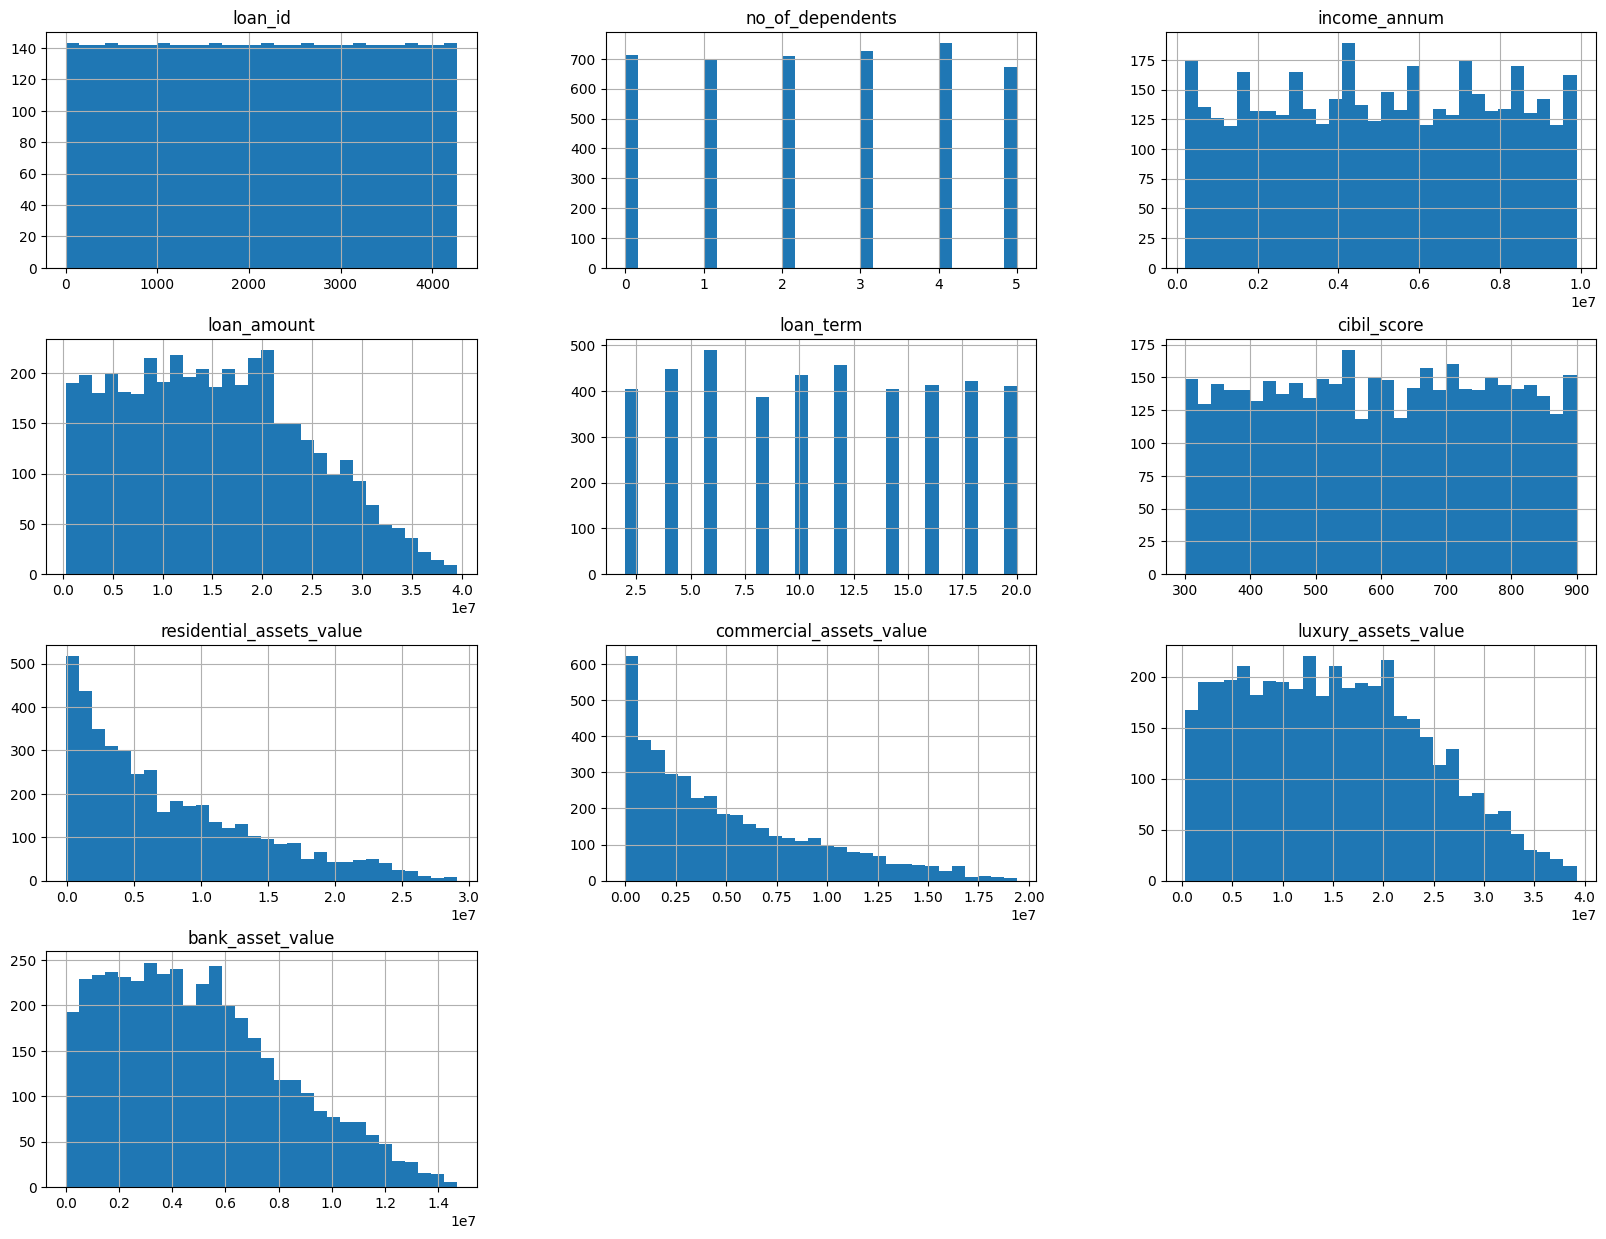

In [8]:
# ------ Visualize the distribution of numerical features ------ 
loan_data.hist(bins=30, figsize=(20, 15))
plt.show()

In [9]:
loan_data['education'].value_counts()

education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64

In [10]:
loan_data['self_employed'].value_counts()

self_employed
Yes    2150
No     2119
Name: count, dtype: int64

In [11]:
loan_data['loan_status'].value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

We have made sure that the above three categorical columns all have only two values.

In [12]:
loan_data['isGraduate'] = loan_data['education'].apply(lambda x: 1 if x == 'Graduate' else 0)
loan_data['isSelfEmployed'] = loan_data['self_employed'].apply(lambda x: 1 if x == 'Yes' else 0)
loan_data['isApproved'] = loan_data['loan_status'].apply(lambda x: 1 if x == 'Approved' else 0)

In [13]:
loan_data_noStrings = loan_data.drop(['education', 'self_employed', 'loan_status'], axis=1)

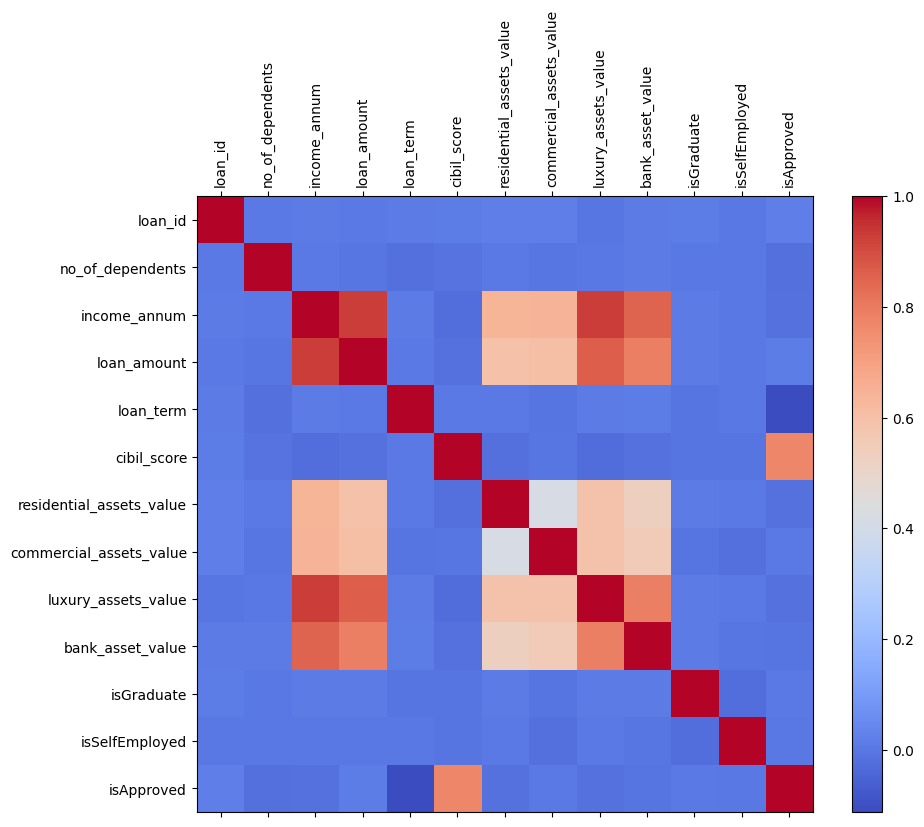

In [14]:
# ------ Correlation matrix ------
corr_matrix = loan_data_noStrings.corr()
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr_matrix, cmap='coolwarm')
fig.colorbar(cax)
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.show()

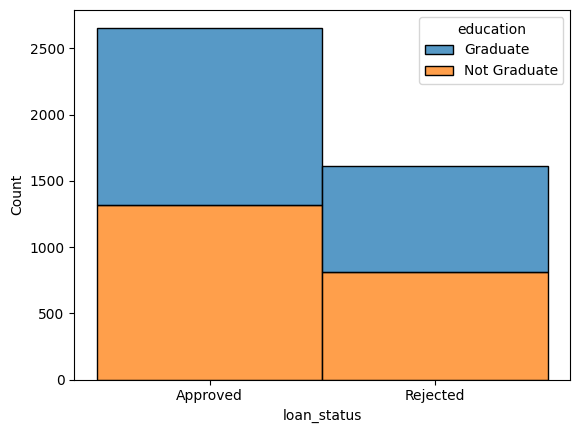

In [15]:
sns.histplot(x='loan_status', data=loan_data, hue='education', multiple='stack')
plt.show()

The percentage of graduate and non-graduate educational level within the two groups of loan status are similar.

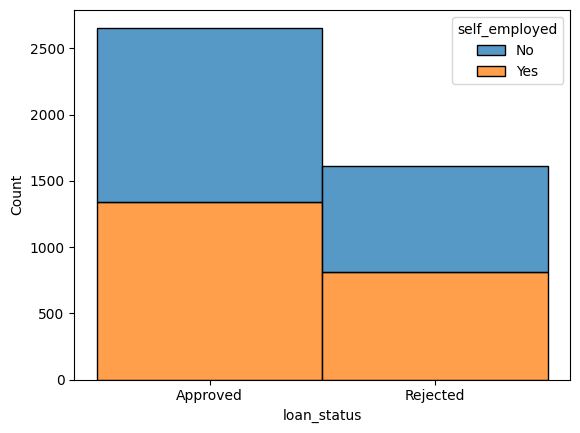

In [16]:
sns.histplot(x='loan_status', data=loan_data, hue='self_employed', multiple='stack')
plt.show()

The percentage of employment status within the two groups of loan status are similar.

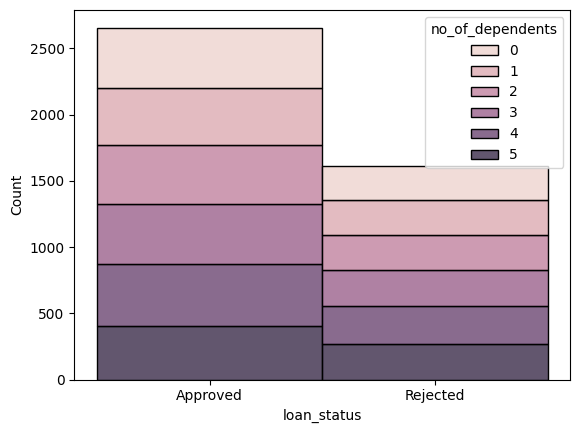

In [17]:
sns.histplot(x='loan_status', data=loan_data, hue='no_of_dependents', multiple='stack')
plt.show()

In [18]:
total_cnts_dep = loan_data.groupby('no_of_dependents').count().take([0], axis=1).reset_index(drop=True).to_numpy().T.tolist()[0]
dbl_cnts_dep = [x for x in total_cnts_dep for _ in range(2)]

In [19]:
df_cnts_dep = loan_data.groupby('no_of_dependents')['loan_status'].value_counts().reset_index(drop=False)

In [20]:
df_cnts_dep['total'] = dbl_cnts_dep
df_cnts_dep['percentage'] = df_cnts_dep['count'] / df_cnts_dep['total']*100

In [21]:
df_cnts_dep

,no_of_dependents,loan_status,count,total,percentage
0,0,Approved,457,712,64.185393
1,0,Rejected,255,712,35.814607
2,1,Approved,430,697,61.692970
3,1,Rejected,267,697,38.307030
4,2,Approved,441,708,62.288136
5,2,Rejected,267,708,37.711864
6,3,Approved,457,727,62.861073
7,3,Rejected,270,727,37.138927
8,4,Approved,465,752,61.835106
9,4,Rejected,287,752,38.164894


We can see from the plot and check from the aggregated data frame that the percentage for different number of dependents are also similar for both loan status groups.

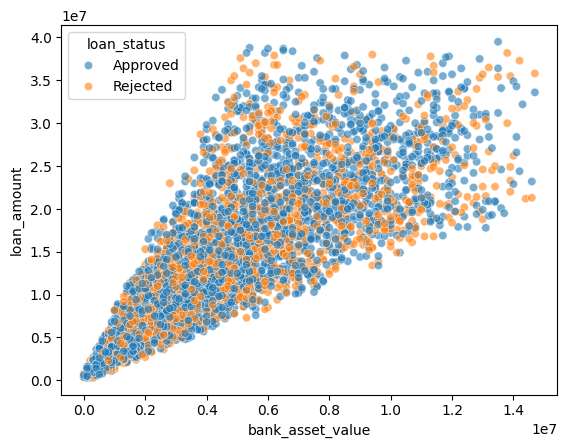

In [22]:
sns.scatterplot(x='bank_asset_value', y='loan_amount', data=loan_data, hue='loan_status', alpha=0.6)
plt.show()

Almost all combination of bank asset and loan amount could get either approved or rejected. The deciding factor is not here.

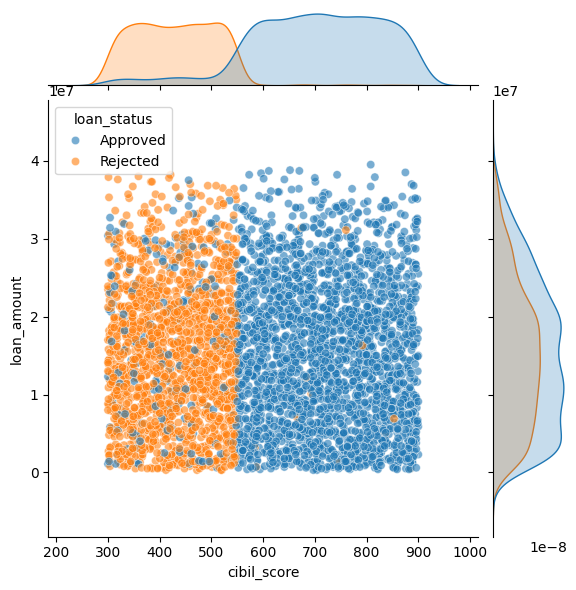

In [23]:
sns.jointplot(x='cibil_score', y='loan_amount', data=loan_data, hue='loan_status', alpha=0.6)
plt.show()

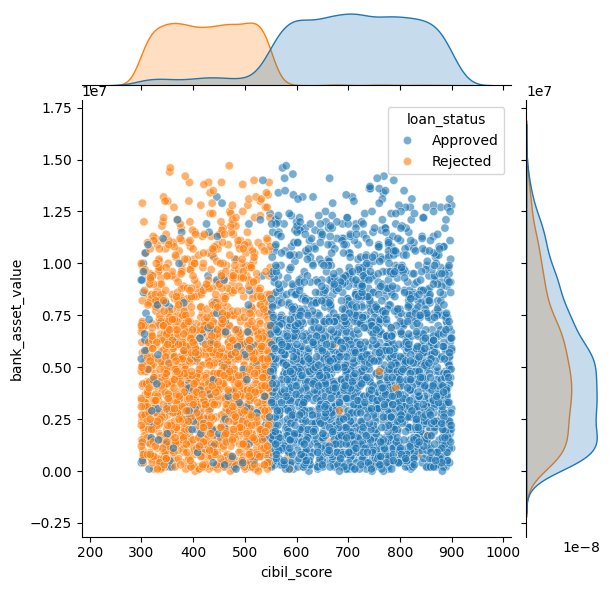

In [24]:
sns.jointplot(x='cibil_score', y='bank_asset_value', data=loan_data, hue='loan_status', alpha=0.6)
plt.show()

Interesting and distinct difference is presented in these two figures, which will be covered together with a couple more plots below. What's also interesting is that the approved and rejected distributions for both different bank asset values and loan amounts are similar.

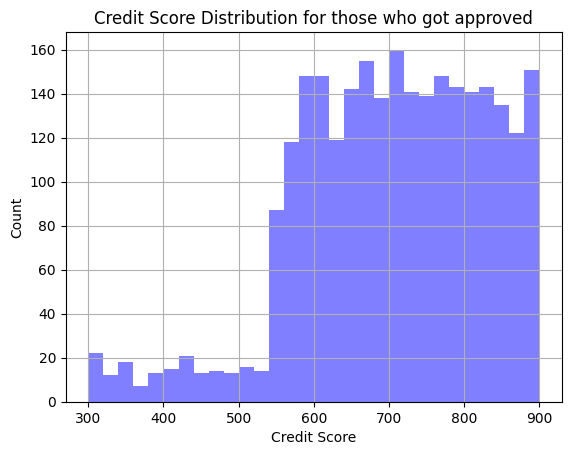

In [25]:
loan_data[loan_data.loan_status == 'Approved']['cibil_score'].hist(bins=30, alpha=0.5, color='blue', label='Approved')
plt.title('Credit Score Distribution for those who got rejected')
plt.title('Credit Score Distribution for those who got approved')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.show()

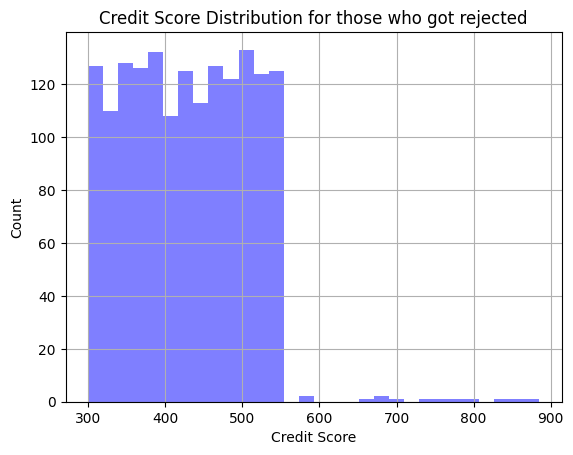

In [26]:
loan_data[loan_data.loan_status == 'Rejected']['cibil_score'].hist(bins=30, alpha=0.5, color='blue', label='Approved')
plt.title('Credit Score Distribution for those who got rejected')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.show()

In [27]:
print(loan_data[loan_data.loan_status == 'Rejected'].groupby('cibil_score').count().to_markdown())

|   cibil_score |   loan_id |   no_of_dependents |   education |   self_employed |   income_annum |   loan_amount |   loan_term |   residential_assets_value |   commercial_assets_value |   luxury_assets_value |   bank_asset_value |   loan_status |   isGraduate |   isSelfEmployed |   isApproved |
|--------------:|----------:|-------------------:|------------:|----------------:|---------------:|--------------:|------------:|---------------------------:|--------------------------:|----------------------:|-------------------:|--------------:|-------------:|-----------------:|-------------:|
|           300 |         8 |                  8 |           8 |               8 |              8 |             8 |           8 |                          8 |                         8 |                     8 |                  8 |             8 |            8 |                8 |            8 |
|           301 |         8 |                  8 |           8 |               8 |              8 |          

In [28]:
print(loan_data[loan_data.loan_status == 'Approved'].groupby('cibil_score').count().to_markdown())

|   cibil_score |   loan_id |   no_of_dependents |   education |   self_employed |   income_annum |   loan_amount |   loan_term |   residential_assets_value |   commercial_assets_value |   luxury_assets_value |   bank_asset_value |   loan_status |   isGraduate |   isSelfEmployed |   isApproved |
|--------------:|----------:|-------------------:|------------:|----------------:|---------------:|--------------:|------------:|---------------------------:|--------------------------:|----------------------:|-------------------:|--------------:|-------------:|-----------------:|-------------:|
|           300 |         3 |                  3 |           3 |               3 |              3 |             3 |           3 |                          3 |                         3 |                     3 |                  3 |             3 |            3 |                3 |            3 |
|           302 |         2 |                  2 |           2 |               2 |              2 |          

From the above several plots and dataframes, we can see that credit score is the critical criterion whether an applicant is approved of the loan. We see that there is a higher chance for applicants who have lower scores to get approved than the chance for applicants who have higher scores to get rejected. That is, a high credit score gets you approved almost always. By the eyeing the printed out dataframes, the cutoff is at 549.

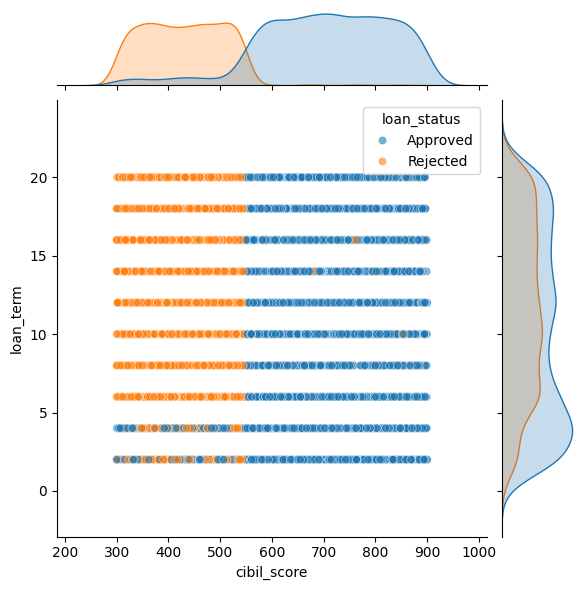

In [29]:
sns.jointplot(x='cibil_score', y='loan_term', data=loan_data, hue='loan_status', alpha=0.6)
plt.show()

If the loan term is smaller than 5, there is more chance for applicants with lower credit scores to get approved.

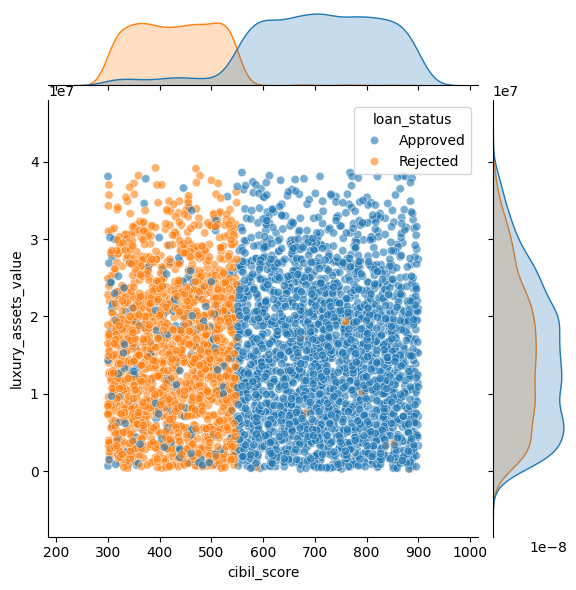

In [30]:
sns.jointplot(x='cibil_score', y='luxury_assets_value', data=loan_data, hue='loan_status', alpha=0.6)
plt.show()

## Feature Engineering

You may want to convert categorical variables to numerical. For example, education takes on the value Graduate and Not Graduate. But we want it to be 0 or 1 for machine learning algorithms to use.

In [31]:
# Already done in when plotting the correlation matrix
# loan_data['isGraduate'] = loan_data['education'].apply(lambda x: 1 if x == 'Graduate' else 0)
# loan_data['isSelfEmployed'] = loan_data['self_employed'].apply(lambda x: 1 if x == 'Yes' else 0)
# loan_data['isApproved'] = loan_data['loan_status'].apply(lambda x: 1 if x == 'Approved' else 0)

## Model Selection, Training and Evaluation

You are free to use any classification machine learning models you like: Logistic Regression, Decision Trees/Random Forests, Support Vector Machines, KNN ... 

In [32]:
loan_data_noStrings.columns

Index(['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'isGraduate', 'isSelfEmployed', 'isApproved'],
      dtype='object')

In [33]:
seed = 42

In [34]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=seed)
for train_index, test_index in split.split(loan_data_noStrings, loan_data_noStrings['isApproved']):
    strat_train_set = loan_data_noStrings.iloc[train_index]
    strat_test_set = loan_data_noStrings.iloc[test_index]

In [35]:
X_train = strat_train_set.drop(['isApproved', 'loan_id'], axis=1)
y_train = strat_train_set['isApproved']
X_test = strat_test_set.drop(['isApproved', 'loan_id'], axis=1)
y_test = strat_test_set['isApproved']

In [36]:
var = X_train.columns

We would also like to normalize the number values.

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

non_binary_cols = ['no_of_dependents', 'income_annum', 'loan_amount', 
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

column_transformer = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), non_binary_cols)
    ],
    remainder='passthrough'  # Keep binary columns unchanged
)

In [38]:
X_train_scaled = column_transformer.fit_transform(X_train)
X_test_scaled = column_transformer.transform(X_test)

In [39]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=var)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=var)

In [40]:
X_train_scaled

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,isGraduate,isSelfEmployed
0,0.890718,-0.092646,-0.088677,-0.850759,1.131102,-0.235163,-1.137306,-0.444440,-0.736827,1.0,0.0
1,0.301107,0.265460,0.180218,1.243433,0.194245,0.107588,0.785995,-0.048387,-0.396795,1.0,1.0
2,-0.288503,1.089102,0.807638,1.243433,0.795684,2.319895,1.747645,1.304793,0.716035,1.0,1.0
3,-0.288503,-0.235888,-0.133492,-0.850759,1.217848,0.902149,-0.175656,-0.015383,0.066884,0.0,1.0
4,1.480328,0.516133,1.087736,-0.501727,1.038573,-0.063787,1.060752,0.061628,1.179714,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3410,0.890718,0.551944,0.101790,0.894401,-1.274654,-0.141686,1.747645,1.051759,-0.149500,1.0,1.0
3411,0.890718,-1.632500,-1.545188,1.243433,0.940261,-0.936246,-1.137306,-1.489579,-1.447801,0.0,1.0
3412,0.301107,0.086407,0.314665,-1.548823,-0.112258,0.434760,0.328066,-0.389433,-0.427707,1.0,1.0
3413,-1.467725,-0.235888,-0.111085,-1.548823,-1.448146,-0.640233,-0.839652,-0.697474,0.376003,1.0,0.0


The task is to **accurately determine the likelihood of loan approval based on the provided features**, which means we are going to use the binary values of 'isApproved', see 1 as 100% and 0 as 0, and predict probability with them. Thus, this is a regression problem.

In [41]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [42]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

#### Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)
y_pred = lm.predict(X_test_scaled)
lin_scores = cross_val_score(lm, X_train_scaled, y_train, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
display_scores(np.sqrt(-lin_scores))

Scores: [0.30085034 0.29733201 0.29229247 0.29574236 0.30420471 0.31968069
 0.29989362 0.31090679 0.31453582 0.30493061]
Mean: 0.3040369431403487
Standard deviation: 0.00825823883715351


Let's check the predictions themselves.

In [44]:
pd.DataFrame(y_pred).describe()

,0
count,854.000000
mean,0.628786
std,0.377347
min,-0.140430
25%,0.305246
50%,0.639045
75%,0.938088
max,1.387320


The result does not looks good since there are negative results, hard to interpret.

#### Random Forest

In [45]:
from sklearn.ensemble import RandomForestRegressor
model = model = RandomForestRegressor(
    n_estimators=100,
    random_state=seed, 
    criterion='squared_error',
    max_depth=None, 
    min_samples_split=2)

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
rf_scores = cross_val_score(model, X_train_scaled, y_train, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
display_scores(np.sqrt(-rf_scores))

Scores: [0.11040463 0.09170414 0.08159234 0.12015949 0.12677281 0.12572255
 0.10707659 0.11493336 0.12819294 0.13869628]
Mean: 0.11452551227348606
Standard deviation: 0.016601745410449835


The error is smaller here.

In [46]:
pd.DataFrame(y_pred).describe()

,0
count,854.000000
mean,0.623782
std,0.472184
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


The min and max looks good for a likelihoood predicting model. Interestingly, from the 50% on, it is all 1. This means random forest is sort of doing classification.

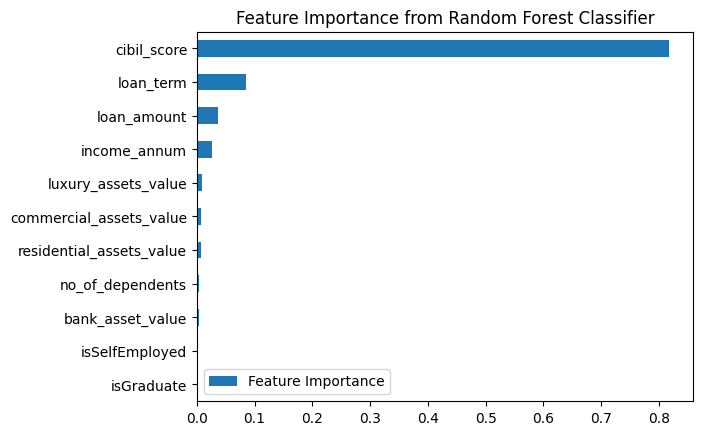

In [47]:
feat_importance = model.feature_importances_
pd.DataFrame({'Feature Importance':feat_importance},
            index=list(var)).sort_values('Feature Importance').plot(kind='barh')
plt.title('Feature Importance from Random Forest Classifier')
plt.show()

Interesting to see here is that the credit score and the loan term are among the most important features, which is noted from the EDA above.

#### Gradient Boosting

In [48]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(
    n_estimators=100,
    random_state=seed, 
    criterion='squared_error',
    max_depth=3, 
    min_samples_split=2)

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
gb_scores = cross_val_score(model, X_train_scaled, y_train, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
display_scores(np.sqrt(-gb_scores))

Scores: [0.14249643 0.12575344 0.10597654 0.13048311 0.15352649 0.14960499
 0.12679591 0.14506904 0.15186157 0.15780011]
Mean: 0.13893676210881148
Standard deviation: 0.01542356901213864


In [49]:
pd.DataFrame(y_pred).describe()

,0
count,854.000000
mean,0.625666
std,0.466222
min,-0.088834
25%,0.014905
50%,0.980928
75%,0.999605
max,1.173624


The result does not looks good since there are negative results, hard to interpret.

#### k-nearest Neighbors

In [50]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=21,
                             weights='uniform',
                             n_jobs=-1)

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
knn_scores = cross_val_score(model, X_train_scaled, y_train, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
display_scores(np.sqrt(-knn_scores))

Scores: [0.26113784 0.26389085 0.25567254 0.26065498 0.27222642 0.28064203
 0.25234551 0.26357202 0.26530715 0.26767768]
Mean: 0.2643127017551449
Standard deviation: 0.00763961587808063


In [51]:
pd.DataFrame(y_pred).describe()

,0
count,854.000000
mean,0.628806
std,0.359302
min,0.000000
25%,0.285714
50%,0.761905
75%,1.000000
max,1.000000


The min and max looks good for a likelihoood predicting model. From this model, only starting from 75% are there all 1's.

## Model Optimization and Testing

#### Grid Search for the best Random Forest Regressor

In [52]:
model = RandomForestRegressor(n_estimators=70,
                               random_state=seed, 
                               criterion='squared_error',
                               max_depth=9, 
                               min_samples_split=2)
param_grid = {
                 'n_estimators': [20, 25, 30, 35, 40, 50, 60, 70, 80, 90, 100],
                 'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
                 'max_depth': [2, 5, 7, 9, 12, 15],
             }
grid_rg = GridSearchCV(model, param_grid, cv=10, n_jobs=-1)
grid_rg.fit(X_train_scaled, y_train)
grid_rg.best_params_

{'criterion': 'friedman_mse', 'max_depth': 15, 'n_estimators': 60}

#### Grid Search for the best Gradient Boosting Regressor

In [53]:
model = GradientBoostingRegressor(
    n_estimators=100,
    random_state=seed, 
    criterion='squared_error',
    max_depth=3, 
    min_samples_split=2)
param_grid = {
                    'n_estimators': [20, 30, 40, 50, 60, 70, 80, 90, 100],
                    'learning_rate': [0.0001, 0.001, 0.01],
                    'subsample': [0.1, 0.3, 0.5, 0.7, 1.0],
                    'max_depth': [2, 3, 5, 7, 9, 12, 15],
                }
grid_rg = GridSearchCV(model, param_grid, cv=10, n_jobs=-1)
grid_rg.fit(X_train_scaled, y_train)
grid_rg.best_params_

{'learning_rate': 0.01, 'max_depth': 15, 'n_estimators': 100, 'subsample': 0.7}

#### Grid Search for the best k-nearest Neighbors Regressor

In [54]:
model = KNeighborsRegressor(n_neighbors=21,
                             weights='uniform',
                             n_jobs=-1)
param_grid = {
                    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
                    'weights': ['uniform', 'distance'],
                }
grid_rg = GridSearchCV(model, param_grid, cv=10, n_jobs=-1)
grid_rg.fit(X_train_scaled, y_train)
grid_rg.best_params_

{'n_neighbors': 15, 'weights': 'distance'}

#### Ensemble Learning

Having understanding the performance of each model on the dataset, it is time for ensemble learning. Linear regressor is left out because it got the highest error and is not tunable.

In [55]:
from sklearn.ensemble import VotingRegressor
rg1 = RandomForestRegressor(n_estimators=60,
                            random_state=seed, 
                            criterion='friedman_mse',
                            max_depth=15, 
                            min_samples_split=2)
rg2 = GradientBoostingRegressor(n_estimators=100,
                                random_state=seed, 
                                criterion='squared_error',
                                learning_rate=0.01,
                                subsample=0.7,
                                max_depth=15, 
                                min_samples_split=2)
rg3 = KNeighborsRegressor(n_neighbors=15,
                          weights='distance',
                          n_jobs=-1)

#### Trying out different weights for the ensemble learning

In [56]:
model = VotingRegressor(estimators=[('rf', rg1), 
                                     ('gb', rg2), 
                                     ('knn', rg3)],
                        n_jobs=-1)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

voting_scores = cross_val_score(model, X_train_scaled, y_train, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
display_scores(np.sqrt(-voting_scores))

Scores: [0.16313724 0.15933845 0.15209942 0.16998034 0.17695205 0.18061896
 0.16096905 0.16879232 0.17571708 0.17820649]
Mean: 0.16858113885639223
Standard deviation: 0.008973331977185745


In [57]:
pd.DataFrame(y_pred).describe()

,0
count,854.000000
mean,0.625992
std,0.370684
min,0.075922
25%,0.176945
50%,0.869093
75%,0.953911
max,0.958059


In [58]:
model = VotingRegressor(estimators=[('rf', rg1), 
                                     ('gb', rg2), 
                                     ('knn', rg3)],
                        weights=[3, 2, 1],
                        n_jobs=-1)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

voting_scores = cross_val_score(model, X_train_scaled, y_train, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
display_scores(np.sqrt(-voting_scores))

Scores: [0.13898947 0.13262908 0.12295996 0.14811539 0.15477132 0.15537654
 0.13696088 0.14512765 0.15436931 0.1592327 ]
Mean: 0.14485323065654093
Standard deviation: 0.011147054322262987


In [59]:
pd.DataFrame(y_pred).describe()

,0
count,854.000000
mean,0.624765
std,0.391662
min,0.075922
25%,0.127065
50%,0.910225
75%,0.953911
max,0.958059


In [60]:
model = VotingRegressor(estimators=[('rf', rg1), 
                                     ('gb', rg2), 
                                     ('knn', rg3)],
                        weights=[5, 2, 1],
                        n_jobs=-1)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

voting_scores = cross_val_score(model, X_train_scaled, y_train, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
display_scores(np.sqrt(-voting_scores))

Scores: [0.12713625 0.11868927 0.1070192  0.13623193 0.14328777 0.14319616
 0.12423454 0.13362809 0.14380193 0.14939816]
Mean: 0.13266232910746176
Standard deviation: 0.012633671279211507


In [61]:
pd.DataFrame(y_pred).describe()

,0
count,854.000000
mean,0.624464
std,0.411599
min,0.056941
25%,0.095299
50%,0.931761
75%,0.965433
max,0.968544


In [62]:
model = VotingRegressor(estimators=[('rf', rg1), 
                                     ('gb', rg2), 
                                     ('knn', rg3)],
                        weights=[20, 2, 1],
                        n_jobs=-1)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

voting_scores = cross_val_score(model, X_train_scaled, y_train, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
display_scores(np.sqrt(-voting_scores))

Scores: [0.1126169  0.10038778 0.08387607 0.12086904 0.12873046 0.12709526
 0.10708158 0.11979375 0.13116467 0.13791673]
Mean: 0.11695322264391188
Standard deviation: 0.015463393652124404


In [63]:
pd.DataFrame(y_pred).describe()

,0
count,854.000000
mean,0.623876
std,0.451060
min,0.019806
25%,0.033147
50%,0.973709
75%,0.987977
max,0.989059


Ensemble learning model yields good results where we don't simply get a lot of 0 and 1's, making the likelihood prediction more robust and applicable. However, the selection and distribution of weights are still up for debates. Here, I test by raising the percentage of random forest because it has the lowest error of all three. The larger weight random forest gets, the lower the mean error, but the larger the standard deviation. The predicted values also are overally higher.